**Linear Regression**

**Regression** analysis is a statistical process for estimating the relationships between two or more variables. The relationship is modeled as $y\sim x$ or $y=f(x)$. Both model descriptions indicate that the variable $y$ is a function of $x$. Therefore the variable $y$ is denoted as **response variable** or **dependent variable**, whereas the variable $x$ is denoted as **predictor variable** or **independent variable**.

**Simple Linear Regression**

In this section we discuss a special type of regression, which is called a **simple linear regression.** In this special case of regression analysis the relationship between the response variable $y$ and the predictor variable $x$ is given in the form of **linear** equation

$$y= a + bx,$$

where $a$ and $b$ are constants. The number $a$ is called **intercept** and defines the point of intersection of the regression line and the $y$-axis ($x=0$). The number $b$ is called **regression coefficient**. It is a measure of the slope of the **regression line**. Thus, $b$ indicates how much the $y$-value changes when the $x$-value increases by $1$ unit. The adjective simple refers to the fact that the outcome variable is related to a single predictor. The model is considered as a deterministic model, as it gives an exact relationship between $x$ and $y$.

Let us consider a simple example. Given a population of $n=3$ points with cartesian coordinates $(x_i,y_i)$ of $(1,6)$, $(2,8)$ and $(3,10)$. These points plot on a straight line and thus, can be described by a linear equation model in the form of $y=a+bx$, where the intercept $a=4$ and $b=2$.

![simple_linear](simple_linear.png)

In many cases however, the relationship between two variables $x$ and $y$ is not exact. This is due to the fact, that the response variable $y$ is affected by other unknown and/or random processes, that are not fully captured by the predictor variable $x$. In such a case the data points do not line up on a straight line. However, the data still may follow an underlying linear relationship. In order to take these unknowns into consideration a **random error term**, denoted by $\epsilon$, is added to the linear model equation, thus resulting in a **probabilistic model** in contrast to the deterministic model from above.

$$y= a + bx + \epsilon$$

where the error term $\epsilon_i$ is assumed to consist of independent normal distributed values, $e_i \sim N(0,\sigma^2)$.

In linear regression modelling following assumptions are made about the model

- The random error term $\epsilon$ has a mean equal to zero for each $x$.

- The errors associated with different observations are independent.

- For any given $x$, the distribution of errors is normal.

- The distribution errors for each $x$ has the same (constant) standard deviation, which is denoted by $\sigma_{\epsilon}$.

Let us consider another example. This time we take a random sample of sample size $n=8$ from a population. In order to emphasize that the values of the intercept and slope are calculated from sample data, $a$ and $b$ are denoted by $\beta_0$ and $\beta_1$, respectively. In addition, the error term $\epsilon$ is denoted as $e$. Thus, $\beta_0,\beta_1$ and $e$ are estimates based on sample data for the the population parameters $a,b$ and $\epsilon$.

$$\hat{y} = \beta_0 + \beta_1 x + e,$$

where $\hat{y}$ is the **estimated or predicted value of** $y$ for any given value of $x$.

![regression_line_error](regression_line_error.png)

The error $e_i$ for each particular pair of values $(x_i,y_i)$ also called **residual**, is computed by the difference of the observed value $y_i$ and the predicted value given by $\hat{y}$.

$$e_i = y_i - \hat{y}_i$$

Depending on the data $e_i$ is a negative number if $y_i$ plots below the regression line or it is positive number if $y_i$ plots above the regression line.

**Parameter Estimation**

Now, as we relaxed the constraints of the deterministic model and introduced an error term $\epsilon$, we run into another problem. There are infinitely many regression lines that fulfill the specifications of the probabilistic model.

![many_lines](many_lines.png)

Obviously, we need a strategy to select that particular regression line, which corresponds to the *best* model in order to describe the data. In this section we discuss on one of the most popular methods to achieve that tast, the so called **ordinary least squares method (OLS).**

As mentioned in the previous section for each particular pair of values $(x_i,y_i)$ the error $e_i$ is calculated by $y_i - \hat{y}_i$. In order to get the best fitting line for the given data the **error sum of squares**, denoted by $SSE$, is minimized.

$$\min \text{SSE} = \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

For the simple linear model there exists an analytic solution for $\beta_1$

$$\hat{\beta_1} = \frac{\sum_{i=1}^n ((x_i- \bar x) (y_i-\bar y))}{\sum_{i=1}^n (x_i-\bar x)^2} = \frac{cov(x,y)}{var(x)}$$

and $\beta_0:$

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

The OLS gives the maximum likelihood estimate for $\hat{\beta}$ when the parameters have equal variance and are uncorrelated, and the residuals $\epsilon$ are uncorrelated and follow a Gaussian distribution.

**Simple Linear Regression - An example**

In order to get some hands-on experience we apply the **simple linear regression** in an exercise. Therefore we load the *students* data set.

In [2]:
import pandas as pd

students_df = pd.read_csv("https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv")

In order to showcase the **simple linear regression** we examine the relationship between two variables, the height of students, as the predictor variable and the weight of students as response variable.

**Data preparation**

For data preparation we randomly sample $12$ students from the data set and build a data frame with two variables of interest (*height* and *weight*). Further we plot the data in form of a scatter plot to visualize the underlying relationship between the two variables.

In [3]:
n = 12

data = students_df[['height','weight']].sample(n)

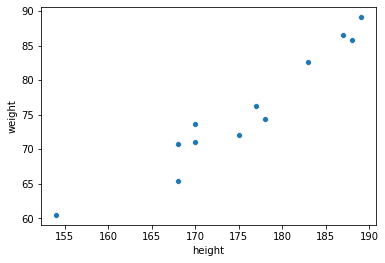

In [8]:
import seaborn as sns

sns.scatterplot(data['height'],data['weight'])

pass

The visual inspection confirms our assumption that the relationship between the height and the weight variable is roughly linear. In other words, with increasing height the individual student tends to have a higher weight.

**Parameter estimation**

Solving for $\beta_0$ and $\beta_1$ of a simple linear model may be calculated analytically. Recall the equation for a linear model from sample data

$$\hat y = \beta_0 + \beta_1 x + e,$$

for $\beta_1$

$$\hat{\beta_1} = \frac{\sum_{i=1}^n ((x_i- \bar x) (y_i-\bar y))}{\sum_{i=1}^n (x_i-\bar x)^2} = \frac{cov(x,y)}{var(x)},$$

and $\beta_0$

$$\hat{\beta_0} = \bar y -\hat{\beta_1} \bar x$$

For a better understanding we use Python to calculate the individual terms.

In [16]:
# calculate b1

x = data['height']
y = data['weight']

x_bar = x.mean()
y_bar = y.mean()

b1=((x-x_bar)*(y-y_bar)).sum() / ((x-x_bar)**2).sum()

b1

0.8199843427514054

In [21]:
# alternative

import numpy as np

np.cov(data['height'],data['weight'],ddof=1)[0,1] /np.var(data['height'],ddof=1)

0.8199843427514053

A perfect match!

Further, we calculate $\beta_0$.

In [22]:
# calculate b0

b0 = y_bar - b1*x_bar

b0

-68.3089175147676

Thus we can write down the regression model

$$\text{weight} = -68.31 + 0.82 \times \text{ height}$$

Now, based on that equation we may determine the weight of a student given its height. Let us predict the weight of a student with height of $156$ cm.

$$\text{weight}_{156} = -68.31 + 0.82 \times 156 \approx 59.61 \text{ kg}$$

In [24]:
from scipy.stats import linregress

linregress(data['height'], data['weight'])

LinregressResult(slope=0.8199843427514054, intercept=-68.3089175147676, rvalue=0.9631634226933022, pvalue=5.021056404241975e-07, stderr=0.07239747850578908)

In [28]:
#this gives a different result will investigate this later

import statsmodels.api as sm

est = sm.OLS(data['weight'],data['height'])

est = est.fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 weight   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              3203.
Date:                Sun, 18 Oct 2020   Prob (F-statistic):                    6.47e-15
Time:                        15:17:06   Log-Likelihood:                         -34.952
No. Observations:                  12   AIC:                                      71.90
Df Residuals:                      11   BIC:                                      72.39
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height         0.4322      0.008     56.597      0.000       0.415       0.449
==============================================================================
Omnibus:                        0.804   Durbin-Watson:                   2.302
Prob(Omnibus):                  0.669   Jarque-Bera (JB):                0.647
Skew:                           0.192   Prob(JB):                        0.724
Kurtosis:                       1.929   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

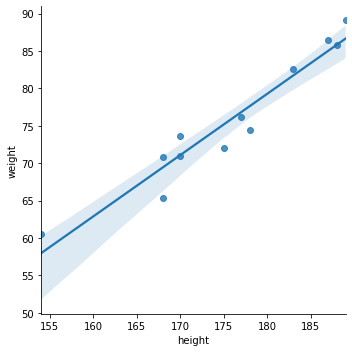

In [32]:
import seaborn as sns

sns.lmplot(x='height',y='weight', data=data)

pass

There are two kinds of bands, referred to as the *narrow* and *wide* limits. The narrow bands, the so-called **confidence bands**, reflect the uncertainty about the line itself. The bands will be narrow if there are many observations, reflecting a well-determined line. The wide-bands, the so-called **prediction bands**, include the uncertainty about future observations. These bands capture the majority of the observed points and do not collapse to a line as the number of observations increase.